In [ ]:
'''
【课程3.6】  基本图表绘制 plt.plot()

图表类别：线形图、柱状图、密度图，以横纵坐标两个维度为主
同时可延展出多种其他图表样式

plt.plot(kind='line', ax=None, figsize=None, use_index=True, title=None, grid=None, legend=False, 
style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, 
rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, label=None, secondary_y=False, **kwds)

'''

In [1]:
# 导包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 魔法函数
%matplotlib inline

2000-01-01    -1.221171
2000-01-02     0.565258
2000-01-03    -1.040357
2000-01-04    -1.999923
2000-01-05    -1.631132
                ...    
2002-09-22    35.567683
2002-09-23    35.757061
2002-09-24    34.953210
2002-09-25    34.192935
2002-09-26    35.502130
Freq: D, Length: 1000, dtype: float64


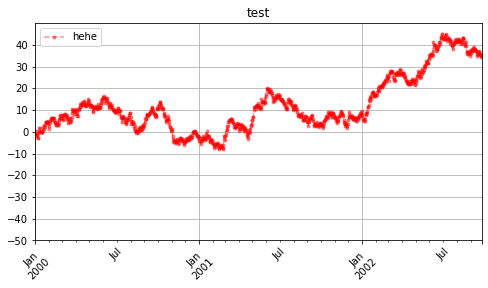

In [14]:
# Series直接生成图表
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
print(ts)
ts.plot(kind='line', 
       label='hehe', 
       style='--g.',
       color='r',
       alpha=0.4,
       use_index=True,
       rot=45,
       grid=True,
       ylim=[-50, 50],
       yticks=list(range(-50, 50, 10)),
       figsize=(8, 4),
       title='test',
       legend=True)
#plt.grid(True, linestyle = "--",color = "gray", linewidth = "0.5",axis = 'x')  # 网格
plt.legend()
# Series.plot()：series的index为横坐标，value为纵坐标
# kind → line,bar,barh...（折线图，柱状图，柱状图-横...）
# label → 图例标签，Dataframe格式以列名为label
# style → 风格字符串，这里包括了linestyle（-），marker（.），color（g）
# color → 颜色，有color指定时候，以color颜色为准
# alpha → 透明度，0-1
# use_index → 将索引用为刻度标签，默认为True
# rot → 旋转刻度标签，0-360
# grid → 显示网格，一般直接用plt.grid
# xlim,ylim → x,y轴界限
# xticks,yticks → x,y轴刻度值
# figsize → 图像大小
# title → 图名
# legend → 是否显示图例，一般直接用plt.legend()
# 也可以 → plt.plot()

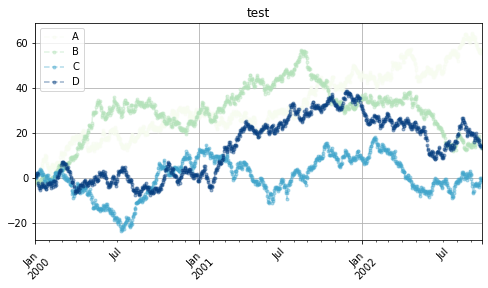

In [15]:
# DataFrame直接生成图表
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot(kind='line',
       style='--.',
       alpha=0.4,
       use_index=True,
       rot=45,
       grid=True,
       figsize=(8, 4),
       title='test',
       legend=True,
       subplots=False,
       colormap='GnBu')
# subplots是否将各个列绘制到不同的图表

In [ ]:
'''

【课程3.7】  柱状图、堆叠图

plt.plot(kind='bar/barh') , plt.bar()
 
'''

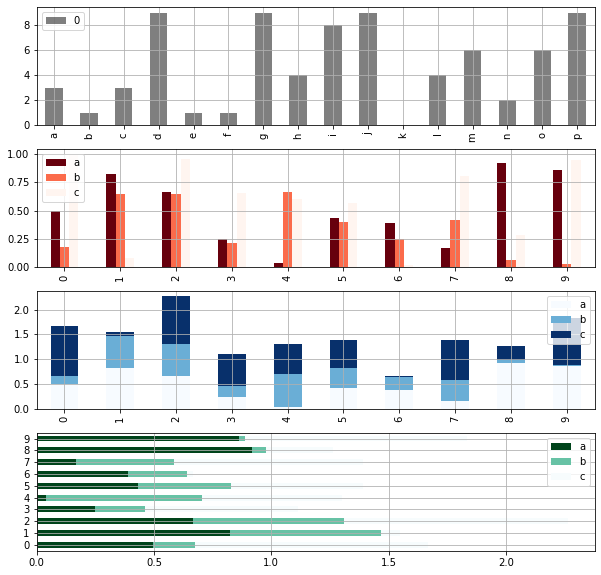

In [36]:
# 柱状图
fig,axes = plt.subplots(4, 1, figsize=(10, 10))  # 创建一个4行1列的子图区域
s = pd.DataFrame(np.random.randint(0, 10, 16), index=list('abcdefghijklmnop'))
df = pd.DataFrame(np.random.rand(10, 3), columns=list('abc'))
s.plot(kind='bar', color='k', grid=True, alpha=0.5, ax=axes[0])  # ax参数:选择第几个子图
# 单系列柱状图方法一:plt.plot(kind='bar/barh')
df.plot(kind='bar', ax=axes[1], grid=True, colormap='Reds_r')
# 单系列柱状图
df.plot(kind='bar', ax=axes[2], grid=True, colormap='Blues', stacked=True)
# 多系列堆叠图
# stacked:堆叠

df.plot.barh(ax=axes[3], grid=True, stacked=True, colormap='BuGn_r')

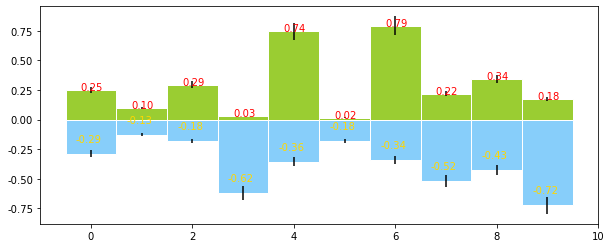

In [55]:
# 柱状图 plt.bar()
plt.figure(figsize=(10, 4))
x = np.arange(10)
y1 = np.random.rand(10)
y2 = -np.random.rand(10)

plt.bar(x, y1, width=1, facecolor='yellowgreen', edgecolor='white', yerr=y1*0.1)
plt.bar(x, y2, width=1, facecolor='lightskyblue', edgecolor='white', yerr=y2*0.1)
# x,y参数:x,y值
# width:宽度比例
# facecolor:柱状图里填充的颜色，edgecolor是边框的颜色
# left-每个柱x轴左边界，bottom-每个柱y轴下边界，bottom扩展即可化为甘特图
# align:决定整个bar图分布，默认left表示默认从左边界开始绘制，center会将图绘制在中间位置
# xerr/yerr:x/y方向error bar

for i, j in zip(x, y1):
    plt.text(i-0.2, j-0.001, '%.2f' % j, color='red')
for i, j in zip(x, y2):
    plt.text(i-0.3, j+0.1, '%.2f' % j, color='gold')
# 给图添加text
# zip()函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表

          Freeze    Wind   Flood   Quake    Hail
100 year   66386  174296   75131  577908   32015
50 year    58230  381139   78045   99308  160454
20 year    89135   80552  152558  497981  603535
10 year    78415   81858  150656  193263   69638
5 year    139361  331509  343164  781380   52269


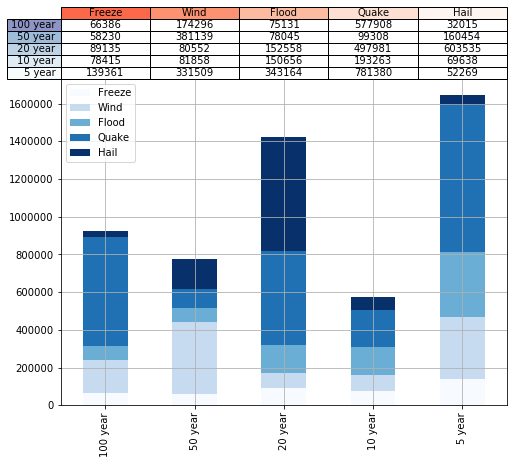

In [78]:
# 外嵌图表plt.table()
# table(cellText=None, cellColours=None,cellLoc='right', colWidths=None,rowLabels=None, rowColours=None, rowLoc='left',
# colLabels=None, colColours=None, colLoc='center',loc='bottom', bbox=None)

data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]
df = pd.DataFrame(data, columns=('Freeze', 'Wind', 'Flood', 'Quake', 'Hail'), index=rows)
print(df)
df.plot(kind='bar', grid=True, colormap='Blues', stacked=True, figsize=(8, 6))

# 创建堆叠图
plt.table(cellText=data, cellLoc='center', rowLabels=rows, colLabels=df.columns, rowColours=plt.cm.BuPu(np.linspace(0, 0.5, 5))[::-1],
         colColours=plt.cm.Reds(np.linspace(0, 0.5, 5))[::-1], rowLoc='right', loc='top')
# BuPu可替换成其他colormap
# cellText：表格文本
# cellLoc：cell内文本对齐位置
# rowLabels：行标签
# colLabels：列标签
# rowLoc：行标签对齐位置
# loc：表格位置 → left，right，top，bottom


In [ ]:
'''

【课程3.8】  面积图、填图、饼图

plt.plot.area()
plt.fill(), plt.fill_between()
plt.pie()

'''

          a         b         c         d
0  0.167763  0.299461  0.060917  0.809034
1  0.397711  0.657296  0.398817  0.984898
2  0.261468  0.339848  0.934931  0.423405
3  0.575250  0.681653  0.586164  0.774624
4  0.145543  0.389758  0.602775  0.900274
5  0.914505  0.867918  0.066573  0.477991
6  0.314092  0.154751  0.508558  0.515641
7  0.631953  0.924459  0.093937  0.271490
8  0.924862  0.214424  0.053864  0.874087
9  0.262898  0.192370  0.312076  0.516263
****************************************************************************************
          a         b         c         d
0  2.512293 -1.402279  0.213515  1.387231
1 -0.814580 -0.975581 -1.239094 -1.550992
2 -1.327509  0.995269  0.282314 -1.832463
3 -0.837139  0.088957 -1.291571  0.558646
4 -0.294665  1.390920  1.247537 -1.420316
5 -0.217723 -0.966776 -0.321136 -0.411695
6  0.181658  1.724424 -0.636145  1.833246
7  0.003819 -1.050545  0.438737  1.237286
8  1.714157  1.004765 -0.281086 -1.393007
9  0.235713  0.311138 -0.1269

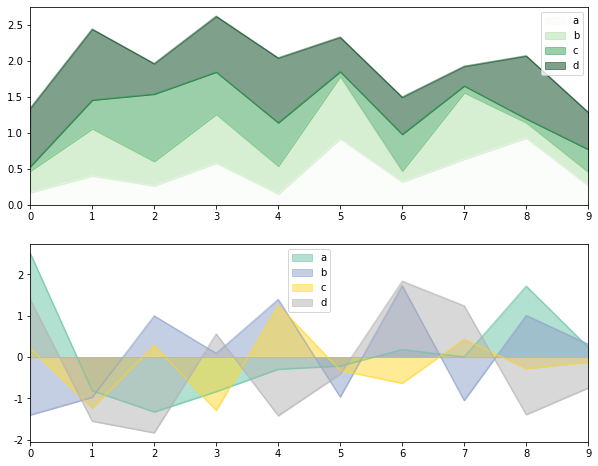

In [84]:
# 面积图
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

df1 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
print(df1)
print('*' * 88)
df2 = pd.DataFrame(np.random.randn(10, 4), columns=['a', 'b', 'c', 'd'])
print(df2)

df1.plot.area(colormap='Greens', alpha=0.5, ax=axes[0])
df2.plot.area(colormap='Set2', alpha=0.5, ax=axes[1], stacked=False)
# 使用Series.plot.area()和DataFrame.plot.area()创建面积图
# stacked:是否堆叠，默认情况下，面积图被堆叠
# 为了产生堆积面积图，每列必须都是正值或者都是负值
# 当数据有NaN值时，自动填充0，所以需要清洗掉缺失值

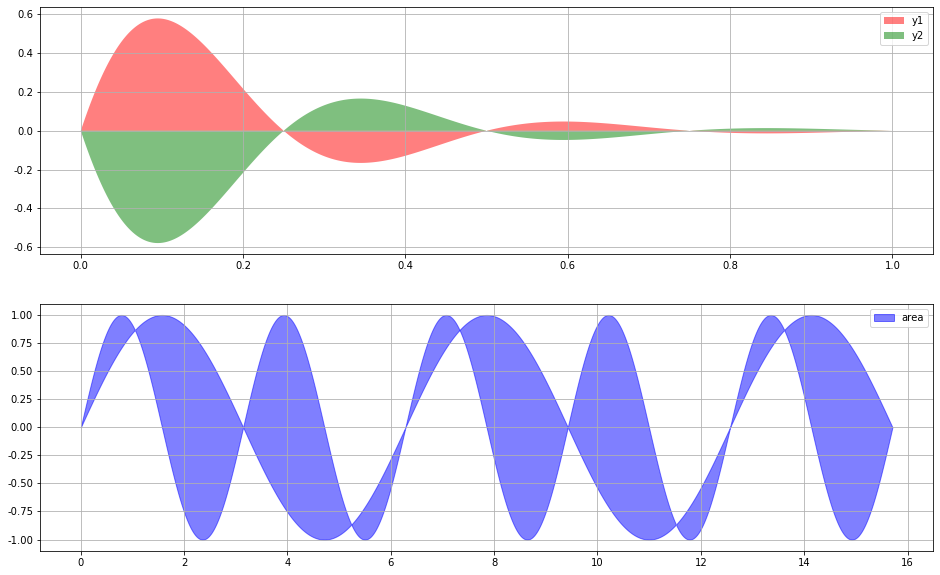

In [94]:
# 填图
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

x = np.linspace(0, 1, 500)
y1 = np.sin(4 * np.pi * x) * np.exp(-5 * x)
y2 = -np.sin(4 * np.pi * x) * np.exp(-5 * x)

axes[0].fill(x, y1, 'r', alpha=0.5, label='y1')
axes[0].fill(x, y2, 'g', alpha=0.5, label='y2')
axes[0].legend()
axes[0].grid()

x = np.linspace(0, 5 * np.pi, 1000) 
y1 = np.sin(x)  
y2 = np.sin(2 * x)
axes[1].fill_between(x, y1, y2, color='b', alpha=0.5, label='area')
axes[1].grid()
axes[1].legend()

a    2.205648
b    2.831242
c    0.990046
d    2.911245
Name: series, dtype: float64


([<matplotlib.patches.Wedge at 0x1217f7d00>,
 [Text(1.1428035286839573, 1.1198214566740072, 'a'),
  Text(-1.2413940270580548, 0.8419862644868892, 'b'),
  Text(-1.1004716982967357, -1.0192948745323398, 'c'),
  Text(0.7808974019028462, -1.2807026382815743, 'd')],
 [Text(0.49997654379923134, 0.4899218872948782, '24.68%'),
  Text(-0.4965576108232219, 0.3367945057947556, '31.68%'),
  Text(-0.44018867931869426, -0.40771794981293585, '11.08%'),
  Text(0.31235896076113845, -0.5122810553126297, '32.57%')])

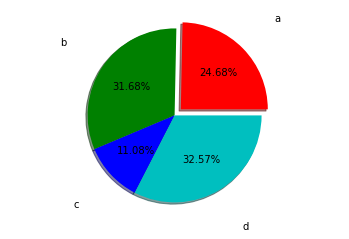

In [108]:
# 饼图 plt.pie()
# plt.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, 
# radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, hold=None, data=None)

s = pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')
print(s)

plt.axis('equal')  # 保证长宽度相等
plt.pie(s,
       explode=[0.1, 0, 0, 0],
       labels=s.index,
       colors=['r', 'g', 'b', 'c'],
       autopct='%.2f%%',
       pctdistance=0.6,
       shadow=True,
       labeldistance=1.5,
       startangle=None,
       radius=None,
       counterclock=True,
       wedgeprops=None,
       textprops=None,
       frame=False,
       rotatelabels=False,)
# 第一个参数：数据
# explode：指定每部分的偏移量
# labels：标签
# colors：颜色
# autopct：饼图上的数据标签显示方式
# pctdistance：每个饼切片的中心和通过autopct生成的文本开始之间的比例
# labeldistance：被画饼标记的直径,默认值：1.1
# shadow：阴影
# startangle：开始角度
# radius：半径
# frame：图框
# counterclock：指定指针方向，顺时针或者逆时针

In [ ]:
'''

【课程3.9】  直方图
plt.hist(x, bins=10, range=None, normed=False, weights=None, cumulative=False, bottom=None, 
histtype='bar', align='mid', orientation='vertical',rwidth=None, log=False, color=None, label=None, 
stacked=False, hold=None, data=None, **kwargs)

'''

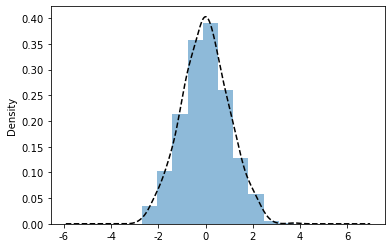

In [118]:
s = pd.Series(np.random.randn(1000))
s.hist(bins=10, grid=True, align='mid', orientation='vertical',alpha=0.5, density=True)
# bin：箱子的宽度
# density 标准化
# histtype 风格，bar，barstacked，step，stepfilled
# orientation 水平还是垂直{‘horizontal’, ‘vertical’}
# align : {‘left’, ‘mid’, ‘right’}, optional(对齐方式)

s.plot(kind='kde', style='k--')
# 密度图

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130deb130>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

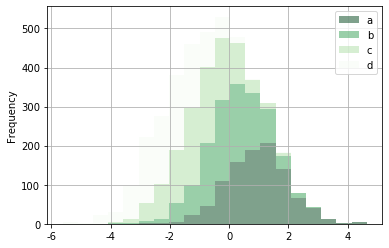

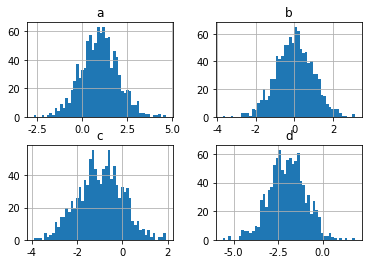

In [116]:
# 堆叠直方图

plt.figure(num=1)
df = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1, 'd': np.random.randn(1000)-2},
                   columns=['a', 'b', 'c','d'])
df.plot.hist(stacked=True,
             bins=20,
             colormap='Greens_r',
             alpha=0.5,
             grid=True)
# 使用DataFrame.plot.hist()和Series.plot.hist()方法绘制
# stacked：是否堆叠

df.hist(bins=50)
# 生成多个直方图

In [ ]:
'''
【课程3.10】  散点图、矩阵散点图

plt.scatter(), pd.scatter_matrix()
 
'''

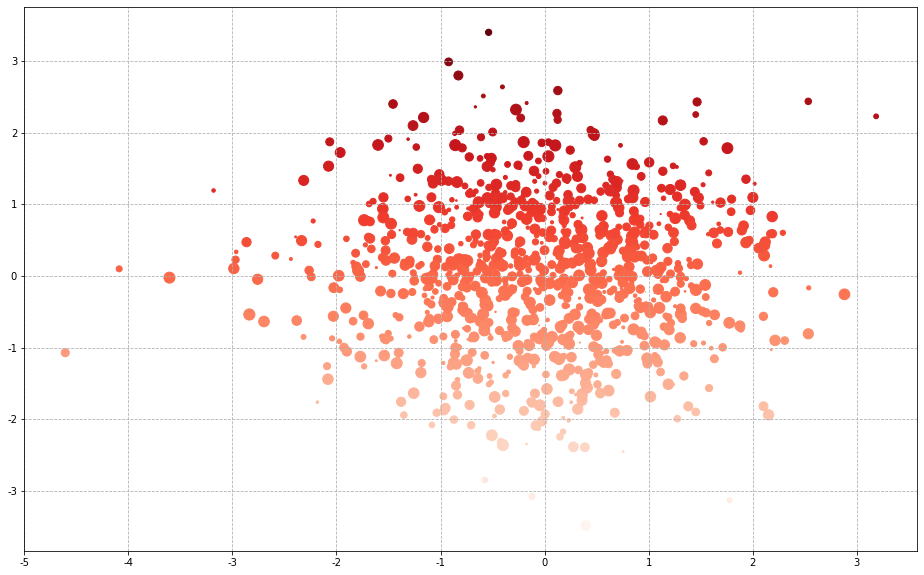

In [134]:
plt.figure(figsize=(16, 10))
x = np.random.randn(1000)
y = np.random.randn(1000)

plt.scatter(x, y, s=np.random.rand(1000)*500, cmap='Reds', marker='.', c=y)
plt.grid(linestyle='--')
# s：散点的大小
# c：散点的颜色
# vmin,vmax：亮度设置，标量
# cmap：colormap

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1355a1fa0>,
      dtype=object)

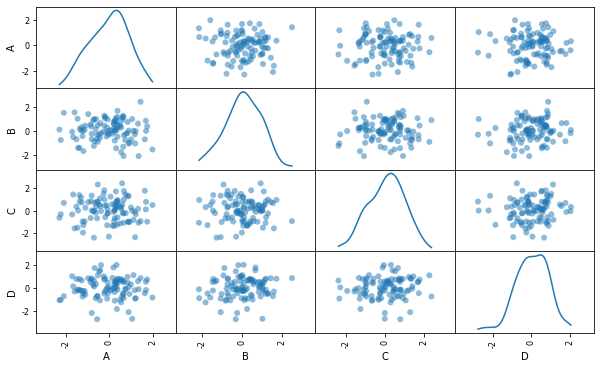

In [141]:
# pd.plotting.scatter_matrix()  散点矩阵
# pd.plotting.scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, 
# grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05, **kwds)

df = pd.DataFrame(np.random.randn(100, 4), columns=list('ABCD'))
pd.plotting.scatter_matrix(df, figsize=(10, 6), alpha=0.5, marker='o', diagonal='kde', range_padding=0.5)

In [ ]:
'''

【课程3.11】  极坐标图

调用subplot()创建子图时通过设置projection='polar',便可创建一个极坐标子图，然后调用plot()在极坐标子图中绘图
 
'''

[ 0.    0.06  0.12  0.18  0.24  0.3   0.36  0.42  0.48  0.54  0.6   0.66
  0.72  0.78  0.84  0.9   0.96  1.02  1.08  1.14  1.2   1.26  1.32  1.38
  1.44  1.5   1.56  1.62  1.68  1.74  1.8   1.86  1.92  1.98  2.04  2.1
  2.16  2.22  2.28  2.34  2.4   2.46  2.52  2.58  2.64  2.7   2.76  2.82
  2.88  2.94  3.    3.06  3.12  3.18  3.24  3.3   3.36  3.42  3.48  3.54
  3.6   3.66  3.72  3.78  3.84  3.9   3.96  4.02  4.08  4.14  4.2   4.26
  4.32  4.38  4.44  4.5   4.56  4.62  4.68  4.74  4.8   4.86  4.92  4.98
  5.04  5.1   5.16  5.22  5.28  5.34  5.4   5.46  5.52  5.58  5.64  5.7
  5.76  5.82  5.88  5.94  6.    6.06  6.12  6.18  6.24  6.3   6.36  6.42
  6.48  6.54  6.6   6.66  6.72  6.78  6.84  6.9   6.96  7.02  7.08  7.14
  7.2   7.26  7.32  7.38  7.44  7.5   7.56  7.62  7.68  7.74  7.8   7.86
  7.92  7.98  8.04  8.1   8.16  8.22  8.28  8.34  8.4   8.46  8.52  8.58
  8.64  8.7   8.76  8.82  8.88  8.94  9.    9.06  9.12  9.18  9.24  9.3
  9.36  9.42  9.48  9.54  9.6   9.66  9.72  9.78  9.84

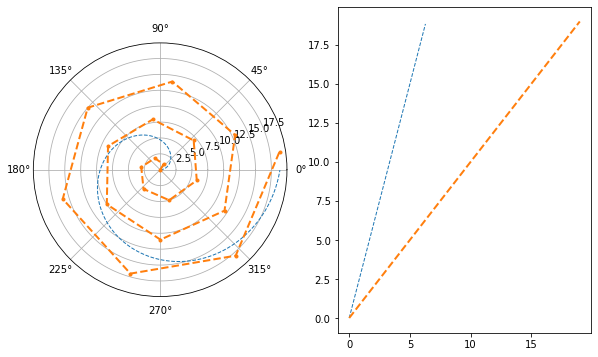

In [22]:
# 创建极坐标图
s = pd.Series(np.arange(20))
theta = np.arange(0, 2*np.pi, 0.02)
# 创建数据

fig = plt.figure(figsize=(10, 6))
ax1 = plt.subplot(121, projection='polar')
ax2 = plt.subplot(122)
# 创建极坐标子图
# 还可以写: ax = fig.add_subplot(111, polar=True)
print(theta*3)
ax1.plot(theta, theta*3, linestyle='--', lw=1)
ax2.plot(theta, theta*3, linestyle='--', lw=1)
print('-' * 88)
print(s)
ax1.plot(s, linestyle='--', marker='.', lw=2)
ax2.plot(s, linestyle='--', lw=2)
# 创建极坐标图，参数1为角度(弧度制)，参数2为value
# lw:线宽度

[0.         0.00333333 0.00666667 0.01       0.01333333 0.01666667
 0.02       0.02333333 0.02666667 0.03       0.03333333 0.03666667
 0.04       0.04333333 0.04666667 0.05       0.05333333 0.05666667
 0.06       0.06333333 0.06666667 0.07       0.07333333 0.07666667
 0.08       0.08333333 0.08666667 0.09       0.09333333 0.09666667
 0.1        0.10333333 0.10666667 0.11       0.11333333 0.11666667
 0.12       0.12333333 0.12666667 0.13       0.13333333 0.13666667
 0.14       0.14333333 0.14666667 0.15       0.15333333 0.15666667
 0.16       0.16333333 0.16666667 0.17       0.17333333 0.17666667
 0.18       0.18333333 0.18666667 0.19       0.19333333 0.19666667
 0.2        0.20333333 0.20666667 0.21       0.21333333 0.21666667
 0.22       0.22333333 0.22666667 0.23       0.23333333 0.23666667
 0.24       0.24333333 0.24666667 0.25       0.25333333 0.25666667
 0.26       0.26333333 0.26666667 0.27       0.27333333 0.27666667
 0.28       0.28333333 0.28666667 0.29       0.29333333 0.2966

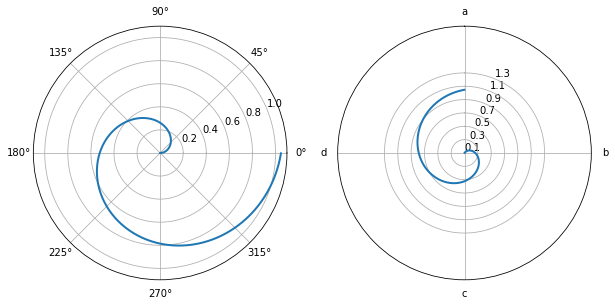

In [33]:
# 极坐标参数设置
theta = np.arange(0, 2*np.pi, 0.02)
plt.figure(figsize=(10, 6))
ax1 = plt.subplot(121, projection='polar')
ax2 = plt.subplot(122, projection='polar')
print(theta/6)

ax1.plot(theta, theta/6, lw=2)
ax2.plot(theta, theta/6, lw=2)
# 创建极坐标子图ax

ax2.set_theta_direction(-1)
# set_theta_direction(-1):调整坐标轴方向为顺时针，默认为逆时针

ax2.set_thetagrids(np.arange(0.0, 360.0, 90), ['a', 'b', 'c', 'd'])
# set_thetagrids():设置极坐标角度网格线显示及标签  网格的数量和标签的数量要相等
ax2.set_rgrids(np.arange(0.2, 2, 0.4))
# set_rgrids():设置极径网格线显示，其中参数必须是正数

ax2.set_theta_offset(np.pi/2)
# set_theta_offset():设置角度偏移，逆时针偏移，弧度制

ax2.set_rlim(0.2, 1.2)
# set_rlim():设置显示的极径范围

ax2.set_rmax(2)
# set_rmax:设置显示的极径最大值

ax2.set_rticks(np.arange(0.1, 1.5, 0.2))
# set_rticks():设置极径网格线的显示范围

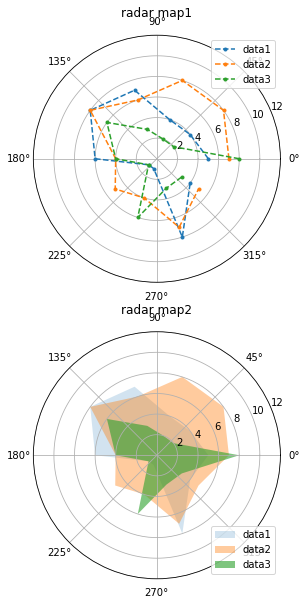

In [45]:
# 雷达图1 - 极坐标的折线图/填图
plt.figure(figsize=(16, 10))

ax1 = plt.subplot(211, projection='polar')
ax1.set_title('radar map1')  # 创建标题
ax1.set_rlim(0, 12)  # 设置显示的极径范围

ax2 = plt.subplot(212, projection='polar')
ax2.set_title('radar map2')
ax2.set_rlim(0, 12)

# 创建数据
data1 = np.random.randint(1, 10, 10)
data2 = np.random.randint(1, 10, 10)
data3 = np.random.randint(1, 10, 10)
theta = np.arange(0, 2*np.pi, 2*np.pi/10)

# 绘制雷达线1
ax1.plot(theta, data1, '.--', label='data1')
ax1.plot(theta, data2, '.--', label='data2')
ax1.plot(theta, data3, '.--', label='data3')
ax1.legend()

# 绘制雷达线2
ax2.fill(theta, data1, alpha=0.2, label='data1')
ax2.fill(theta, data2, alpha=0.4, label='data2')
ax2.fill(theta, data3, alpha=0.6, label='data3')
ax2.legend()

[0 7 2 9 7 5]
----------------------------------------------------------------------------------------
[6 2 3 2 3 5]
----------------------------------------------------------------------------------------
angles: [0.         1.04719755 2.0943951  3.14159265 4.1887902  5.23598776]
闭合后的data1: [0 7 2 9 7 5 0]
----------------------------------------------------------------------------------------
闭合后的data2: [6 2 3 2 3 5 6]
----------------------------------------------------------------------------------------
闭合后的angles: [0.         1.04719755 2.0943951  3.14159265 4.1887902  5.23598776
 0.        ]
----------------------------------------------------------------------------------------


(0, 10)

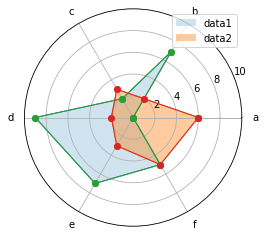

In [66]:
# 雷达图2 - 极坐标的折线图/填图 - plt.polar()
# 首尾闭合
labels = np.array(['a', 'b', 'c', 'd', 'e', 'f'])  # 标签
dataLength = 6  # 数据长度
data1 = np.random.randint(0, 10, 6)
print(data1)
print('-' * 88)
data2 = np.random.randint(0, 10, 6)  # 数据
print(data2)
print('-' * 88)

angles = np.linspace(0, 2*np.pi, dataLength, endpoint=False)  # 将360度分成6份
print('angles:', angles)
data1 = np.concatenate((data1, [data1[0]]))  # 闭合data1
print('闭合后的data1:', data1)
print('-' * 88)
data2 = np.concatenate((data2, [data2[0]]))  # 闭合data2
print('闭合后的data2:', data2)
print('-' * 88)
angles = np.concatenate((angles, [angles[0]]))  # 闭合angles
print('闭合后的angles:', angles)
print('-' * 88)

plt.polar(angles, data1, 'o-', linewidth=1)  # 做极坐标
plt.polar(angles, data2, 'o-', linewidth=1)  # 做极坐标

plt.polar(angles, data1, 'o-', linewidth=1)  # 做极坐标
plt.polar(angles, data2, 'o-', linewidth=1)  # 做极坐标
plt.fill(angles, data1, alpha=0.2, label='data1')  # 填充
plt.fill(angles, data2, alpha=0.4, label='data2')  # 填充
plt.legend()
plt.thetagrids(angles*180/np.pi, labels)
plt.ylim(0, 10)  # polar的极值设置为ylim

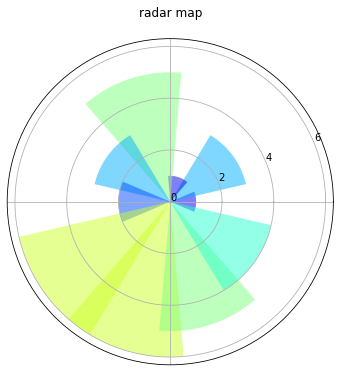

In [76]:
# 极轴图 - 极坐标的柱状图
plt.figure(figsize=(10, 6))

ax1 = plt.subplot(111, projection='polar')
ax1.set_title('radar map')  # 设置标题
ax1.set_rticks(np.arange(0, 13, 2))
ax1.set_thetagrids(np.arange(0, 360, 90), [])

data = np.random.randint(1, 10, 10)
theta = np.arange(0, 2*np.pi, 2*np.pi/10)
# 准备数据

bar = ax1.bar(theta, data, alpha=0.5)

for (r, bar) in zip(data, bar):
    bar.set_facecolor(plt.cm.jet(r/10))